## Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Establishing the Inputs and Outputs for Parity problem

In [ ]:
inputs = np.array([[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1],
    [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1],
    [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1],
    [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]])

In [ ]:
outputs = np.array([[np.sum(X)%2] for X in inputs])

In [ ]:
outputs

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

## Initiating the weights and biases along with their sizes

In [ ]:
W1 = np.random.uniform(-1.0, 1.0, (4, 4))
W2 = np.random.uniform(-1.0, 1.0, (4, 1))

In [ ]:
W1

array([[-0.09210936, -0.26877587,  0.75996943, -0.32275921],
       [ 0.87668576, -0.70411716,  0.9042849 ,  0.539733  ],
       [-0.65087226, -0.88674635, -0.46063582,  0.1743842 ],
       [ 0.9067979 ,  0.61138103,  0.85211414, -0.80702252]])

In [ ]:
W2

array([[0.83167354],
       [0.46154436],
       [0.78560989],
       [0.09755663]])

In [ ]:
b1=np.random.uniform(-1.0, 1.0, (4))
b2 = np.random.uniform(-1.0, 1.0, (1))

In [ ]:
b1

array([ 0.553289  , -0.84020581, -0.23648861,  0.97238006])

In [ ]:
b2

array([0.68649735])

## Defining the sigmoid Function and its Derivative Function

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
def sigmoid_derivative(x):
  return x*(1-x)

## Defining the Forward Pass

In [ ]:
#forward pass
def forward_pass(X, W1, b1, W2, b2):
    # Compute hidden layer activation
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    # Compute output layer activation
    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    return hidden_output, final_output


## Defining the Backward Pass

In [ ]:
# Backward pass
def backward_pass(X, y, hidden_output, final_output):
    # Output layer error
    error = y - final_output
    d_output = error * sigmoid_derivative(final_output)

    # Gradient for hidden to output layer weights
    W2_gradient = np.dot(hidden_output.T, d_output)
    b2_gradient = np.sum(d_output, axis=0)

    # Hidden layer error
    hidden_error = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_output)

    # Gradient for input to hidden layer weights
    W1_gradient = np.dot(X.T, hidden_error)
    b1_gradient = np.sum(hidden_error, axis=0)

    return W1_gradient, b1_gradient, W2_gradient, b2_gradient


## Defining Function for Updating Weights and Biases

In [ ]:
# Weight updates with momentum
def update_weights(W1, b1, W2, b2, W1_update, b1_update, W2_update, b2_update, W1_gradient, b1_gradient, W2_gradient, b2_gradient, learning_rate, momentum):
    # Update hidden to output weights with momentum
    W2_update = momentum * W2_update + learning_rate * W2_gradient
    b2_update = momentum * b2_update + learning_rate * b2_gradient
    W2 += W2_update
    b2 += b2_update

    # Update input to hidden weights with momentum
    W1_update = momentum * W1_update + learning_rate * W1_gradient
    b1_update = momentum * b1_update + learning_rate * b1_gradient
    W1 += W1_update
    b1 += b1_update

    return W1_update, b1_update, W2_update, b2_update,W1,b1,W2,b2


## Implementing the Training Loop

In [ ]:
def train_network(X, y, W1, b1, W2, b2, W1_update,W2_update,b1_update,b2_update,learning_rate, momentum, max_epochs=1000000000, error_threshold=0.05):
  start_time = time.time()
  for epoch in range(max_epochs):
    #print("epoch:",epoch)
    hidden_output, final_output = forward_pass(X, W1, b1, W2, b2)
    #print("hidden_layer_output:", hidden_output)
    #print("final_output:", final_output)
    W1_gradient, b1_gradient, W2_gradient, b2_gradient = backward_pass(X, y, hidden_output, final_output)

    # Update weights and momentum terms
    W1_update, b1_update, W2_update, b2_update,W1,b1,W2,b2 = update_weights(W1, b1, W2, b2, W1_update, b1_update, W2_update, b2_update, W1_gradient, b1_gradient, W2_gradient, b2_gradient, learning_rate, momentum)
    #print("updates weights:", W1)

    # Check for stopping condition
    if np.all(np.abs(y - final_output) <= error_threshold):
      end_time = time.time()
      print(f"Training completed in {epoch} epochs.")
      print(f"The absolute error for learning rate {learning_rate} and momentum {momentum} is {np.max(np.abs(y - final_output))}.")
      training_time = end_time - start_time
      print(f"Training time for learning rate {learning_rate} and momentum {momentum} is {training_time:.4f} seconds.", '\n')
      break

  return epoch,training_time





## Initializing the weights update to zero

In [ ]:
# Initialize weight updates to zero
W1_update = np.zeros_like(W1)
b1_update = np.zeros_like(b1)
W2_update = np.zeros_like(W2)
b2_update = np.zeros_like(b2)


## Stating the Learning rates and Momentum values

In [ ]:
learning_rates = np.arange(0.05, 0.55, 0.05)
momentum = 0
time_0=[]
for eta in learning_rates:
    print(f"Training with learning rate: {eta}")
    # Re-initialize weights and biases for each training run
    W1 = np.random.uniform(-1.0, 1.0, (4, 4))
    b1 = np.random.uniform(-1.0, 1.0, (4))
    W2 = np.random.uniform(-1.0, 1.0, (4, 1))
    b2 = np.random.uniform(-1.0, 1.0, (1))

    # Train the network
    epochs,training_time = train_network(inputs, outputs, W1, b1, W2, b2, W1_update,W2_update,b1_update,b2_update,learning_rate=eta, momentum=momentum)
    time_0.append(training_time)
    #print(f"Learning rate: {eta}, Epochs: {epochs}")


Training with learning rate: 0.05
Training completed in 33337 epochs.
The absolute error for learning rate 0.05 and momentum 0 is 0.04999818811226812.
Training time for learning rate 0.05 and momentum 0 is 13.7107 seconds. 

Training with learning rate: 0.1
Training completed in 650796 epochs.
The absolute error for learning rate 0.1 and momentum 0 is 0.0499998440055472.
Training time for learning rate 0.1 and momentum 0 is 96.8166 seconds. 

Training with learning rate: 0.15000000000000002
Training completed in 493844 epochs.
The absolute error for learning rate 0.15000000000000002 and momentum 0 is 0.049999530927828016.
Training time for learning rate 0.15000000000000002 and momentum 0 is 56.2280 seconds. 

Training with learning rate: 0.2
Training completed in 13787 epochs.
The absolute error for learning rate 0.2 and momentum 0 is 0.04999727020747277.
Training time for learning rate 0.2 and momentum 0 is 1.4083 seconds. 

Training with learning rate: 0.25
Training completed in 1091

In [ ]:
learning_rates = np.arange(0.05, 0.55, 0.05)
momentum = 0.9
time_9=[]
for eta in learning_rates:
    print(f"Training with learning rate: {eta}")
    # Re-initialize weights and biases for each training run
    W1 = np.random.uniform(-1.0, 1.0, (4, 4))
    b1 = np.random.uniform(-1.0, 1.0, (4))
    W2 = np.random.uniform(-1.0, 1.0, (4, 1))
    b2 = np.random.uniform(-1.0, 1.0, (1))

    # Train the network
    epochs,training_time = train_network(inputs, outputs, W1, b1, W2, b2, W1_update,W2_update,b1_update,b2_update,learning_rate=eta, momentum=momentum)
    time_9.append(training_time)
    #print(f"Learning rate: {eta}, Epochs: {epochs}")


Training with learning rate: 0.05
Training completed in 159833 epochs.
The absolute error for learning rate 0.05 and momentum 0.9 is 0.049999008129870015.
Training time for learning rate 0.05 and momentum 0.9 is 18.0647 seconds. 

Training with learning rate: 0.1
Training completed in 2101 epochs.
The absolute error for learning rate 0.1 and momentum 0.9 is 0.04999218813725559.
Training time for learning rate 0.1 and momentum 0.9 is 0.1891 seconds. 

Training with learning rate: 0.15000000000000002
Training completed in 1806 epochs.
The absolute error for learning rate 0.15000000000000002 and momentum 0.9 is 0.04998007181413244.
Training time for learning rate 0.15000000000000002 and momentum 0.9 is 0.1779 seconds. 

Training with learning rate: 0.2
Training completed in 65642 epochs.
The absolute error for learning rate 0.2 and momentum 0.9 is 0.04999453885240701.
Training time for learning rate 0.2 and momentum 0.9 is 6.1600 seconds. 

Training with learning rate: 0.25
Training compl

## Plotting Traning time vs Learning rate for two momentum values

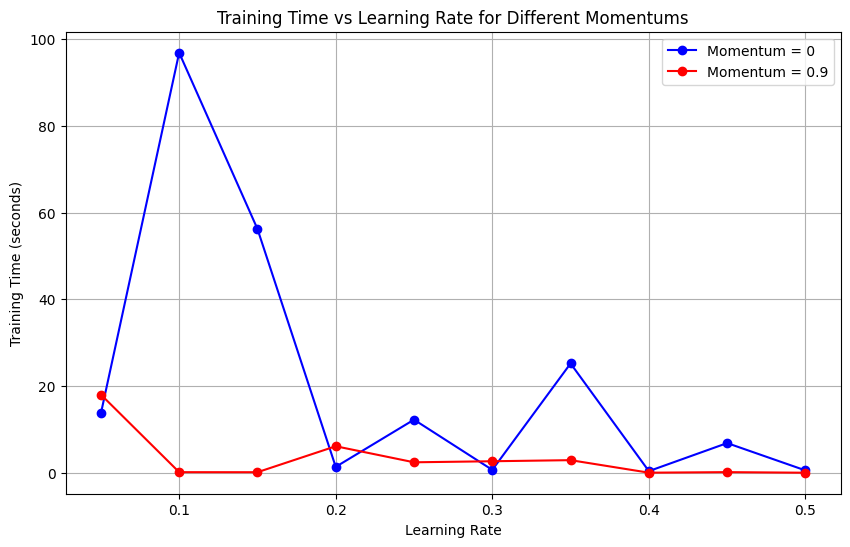

In [ ]:
learning_rates = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
# Create the plot
plt.figure(figsize=(10, 6))

# Line for momentum = 0 (blue)
plt.plot(learning_rates, time_0, color='blue', marker='o', label='Momentum = 0')

# Line for momentum = 0.9 (red)
plt.plot(learning_rates, time_9, color='red', marker='o', label='Momentum = 0.9')

# Adding title and labels
plt.title('Training Time vs Learning Rate for Different Momentums')
plt.xlabel('Learning Rate')
plt.ylabel('Training Time (seconds)')

# Adding a legend
plt.legend(loc='best')

# Adding grid
plt.grid(True)

# Show the plot
plt.show()